In [1]:
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.affinity import rotate
plt.rcParams['font.family'] = 'DejaVu Sans Mono'

In [8]:
world = gpd.read_file('../day3_polygons/ne_10m_admin_0_countries.zip')

world = world.explode(index_parts=True)

world['rotated'] = world.apply(lambda q: rotate(q.geometry, angle=180), axis=1)
world = world.set_geometry('rotated').set_crs(4326)

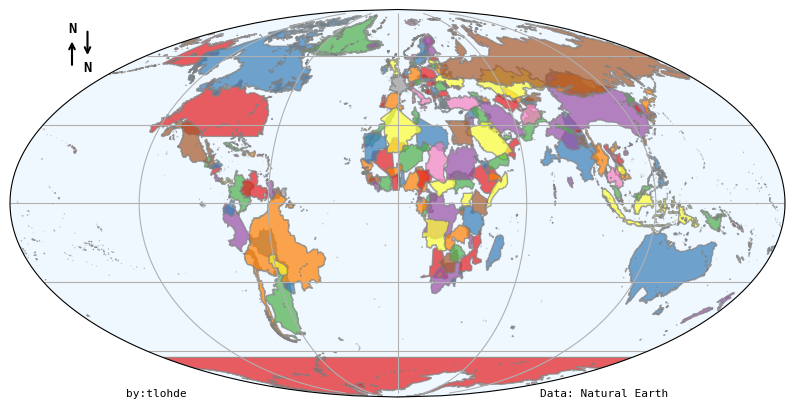

In [18]:
prj = ccrs.Mollweide()
fig,ax=plt.subplots(subplot_kw={'projection':prj}, figsize=[10,7])

world.to_crs(prj).plot(column='MAPCOLOR9', cmap='Set1', ec='grey', alpha=0.7, ax=ax)

ax.gridlines(ccrs.PlateCarree())

for start,end in zip([(0.08,0.85), (0.1,0.95)],
                     [(0.08,0.95), (0.1,0.85)]):
    ax.annotate(text='N',
                xy=start,
                xytext=end,
                xycoords='axes fraction',
                arrowprops=dict(arrowstyle='<-',
                                lw=1.5,
                                color='k'),
                ha='center',
                va='center',
                weight='bold')
    
ax.annotate(text='Data: Natural Earth',
            xy=(0.85,0), 
            xycoords='axes fraction', 
            ha='right',
            fontsize=8)

ax.annotate(text='by:tlohde',
            xy=(0.15,0), 
            xycoords='axes fraction',
            ha='left',
            fontsize=8)

ax.set_facecolor('aliceblue')

fig.savefig('day22.png', bbox_inches='tight', dpi=300)

In [42]:
something = {'europe':{'prj':ccrs.AlbersEqualArea(),
                  'extent':(-15,40,30,70)},
        'africa':{'prj':ccrs.AlbersEqualArea(standard_parallels=(-20,21),
                                             central_longitude=15,
                                             central_latitude=0),
                  'extent':(-20,60,-50,50)}}

for region, vars in something.items():

    fig, ax=plt.subplots(subplot_kw={'projection':vars['prj']}, figsize=[10,7])

    world.to_crs(vars['prj']).plot(column='MAPCOLOR9', cmap='Set1', ec='grey', alpha=0.7, ax=ax)

    ax.gridlines(ccrs.PlateCarree())

    for start,end in zip([(0.08,0.85), (0.1,0.95)],
                        [(0.08,0.95), (0.1,0.85)]):
        ax.annotate(text='N',
                    xy=start,
                    xytext=end,
                    xycoords='axes fraction',
                    arrowprops=dict(arrowstyle='<-',
                                    lw=1.5,
                                    color='k'),
                    ha='center',
                    va='center',
                    weight='bold')
        
    ax.annotate(text='Data: Natural Earth',
                xy=(0.99,-0.02), 
                xycoords='axes fraction', 
                ha='right',
                fontsize=8)

    ax.annotate(text='by:tlohde',
                xy=(0.01,-0.02), 
                xycoords='axes fraction',
                ha='left',
                fontsize=8)

    ax.set_facecolor('aliceblue')
    ax.set_extent(vars['extent'], crs=ccrs.PlateCarree())

    fig.savefig(f'day22_{region}.png', bbox_inches='tight', dpi=300)